# Text Classification using Word2Vec and Average Word2Vec

1. DATASET= Spam/ham classification,where we have to predict whether our emails are ham or spam.

2. DATASET SIZE= contains 5672 rows and 2 columns and is downloaded for kaggle

3. OUTPUT= label--->[spam,ham]

In [1]:
!pip install gensim

In [2]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
vec_king = wv['king']


In [3]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [4]:
vec_king.shape

(300,)

In [5]:
import pandas as pd
messages = pd.read_csv('C:\\NLP\\SpamData\\spam.csv', encoding='latin-1')
messages

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
messages.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [7]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


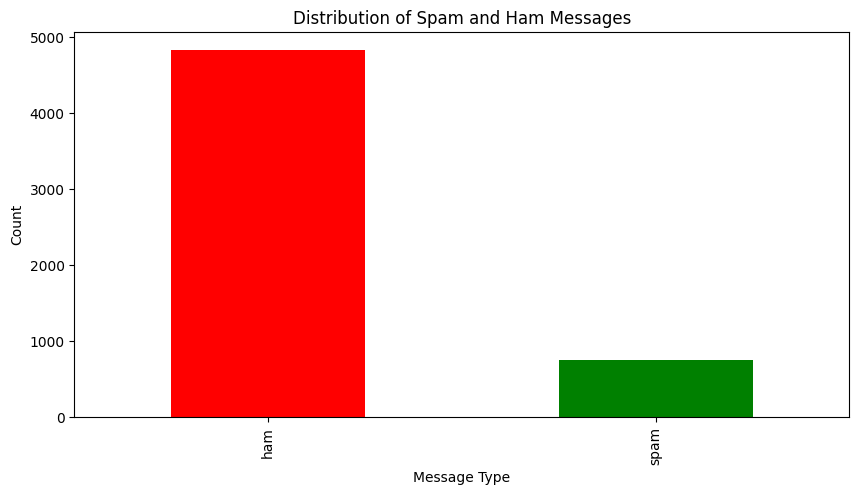

In [8]:
#visualize the data
import matplotlib.pyplot as plt
messages['label'].value_counts().plot(kind='bar', color=['red', 'green'], figsize=(10, 5))
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

In [9]:
messages['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
messages['label'].value_counts(normalize=True)*100

label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

In [11]:
messages.shape

(5572, 2)

# Stemming, Data Cleaning and preprocessing

In [12]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
# Data Preprocessing
corpus = []
for i in range(0, len(messages)):
    # Remove special characters and digits
    message = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    # Convert to lowercase
    message = message.lower()
    # Tokenize the message
    message = message.split()
    # lemmatizarion
    message = [lemmatizer.lemmatize(word) for word in message]
    message= ' '.join(message)
    # Append to corpus 
    corpus.append(message)



In [15]:
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he life around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hour only',
 'had your mobile month or more u r entitled to update to the latest colour mobile with camera for free call the mobile up

In [16]:
len(corpus)

5572

In [17]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\owais\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
# use gensim.utils to  import the simple_preprocess function
# it tokenizes the text and removes punctuation and special characters
from gensim.utils import simple_preprocess
from nltk import sent_tokenize

words = []
for sent in corpus:
    sent_token = sent_tokenize(sent)
    for word in sent_token:
        words.append(simple_preprocess(word))

In [19]:
len(words)

5569

In [20]:
# After preprocessing, we can see that the words are now in a clean format.
# # We can see that there are some rows with no words in the corpus.
# Let's check the number of missing rows in the corpus.
missing_rows = [[i,j,k] for i,j,k in zip(list(map(len, corpus)), corpus,messages['message']) if i<1]
print(f"Number of missing rows: {len(missing_rows)}")
missing_rows

Number of missing rows: 3


[[0, '', '645'], [0, '', ':) '], [0, '', ':-) :-)']]

# Create word2v2c Model

Convert list of words---->vectors

In [21]:
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say'],
 ['nah',
  'don',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'life',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'been',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv'],
 ['even',
  'my',
  'brother',
  'is',
  'not',
  'like',
  'to',
  'spea

In [22]:
# choose first sentence in list of words
words[0]

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [23]:
import gensim
from gensim.models import Word2Vec
model = Word2Vec(words, vector_size=100) # vector_size=100 # size of the word vector representation of each word
model.save("word2vec.model") # save the model

In [24]:
model

In [25]:
# getting all the words in the model
# index to key is a list of all the words in the model,sorted by frequency
model.wv.index_to_key

['you',
 'to',
 'the',
 'and',
 'it',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'call',
 'of',
 'that',
 'have',
 'on',
 'now',
 'are',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'do',
 'get',
 'at',
 'be',
 'if',
 'will',
 'ur',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'how',
 'go',
 'up',
 'when',
 'ok',
 'day',
 'what',
 'free',
 'from',
 'out',
 'all',
 'know',
 'll',
 'come',
 'like',
 'time',
 'good',
 'then',
 'am',
 'got',
 'wa',
 'there',
 'he',
 'text',
 'only',
 'love',
 'want',
 'send',
 'txt',
 'need',
 'one',
 'today',
 'by',
 'going',
 'don',
 'home',
 'stop',
 'about',
 'she',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'our',
 'think',
 'dont',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'later',
 'they',
 'her',
 'any',
 'pls',
 'ha',
 'please',
 'co',
 'did',
 'msg',
 'been',
 'min',
 'some',
 'an',
 'make',
 'dear',
 'here',
 'night',
 'who',
 'message',
 'say',
 'well',
 're',
 'where',
 'thing',
 'much',
 'clai

In [26]:
model.wv['king']

array([-0.07227003,  0.0520107 ,  0.02977668,  0.05749842,  0.01741325,
       -0.1432194 ,  0.05566241,  0.16506562, -0.0697143 , -0.04522667,
       -0.05343425, -0.15526487, -0.03803781,  0.01068563,  0.04679015,
       -0.04877517,  0.03847323, -0.11966083, -0.01088902, -0.15832981,
        0.04396642,  0.04033801,  0.06390137, -0.03555603, -0.00321254,
        0.02731678, -0.02686768, -0.08647599, -0.08198847,  0.00531922,
        0.08086535,  0.01477574,  0.02636538, -0.05438026, -0.04657355,
        0.09714813,  0.0184928 , -0.0787496 , -0.04041628, -0.16014698,
        0.01496053, -0.04614605, -0.03866188,  0.03499721,  0.06798296,
       -0.04759958, -0.03475397, -0.02703714,  0.02250864,  0.0362884 ,
        0.04044311, -0.08270587, -0.02166416,  0.01911264, -0.04261425,
        0.04214747,  0.04183138,  0.01265292, -0.10117809,  0.05055206,
        0.00627153, -0.00288056, -0.00764144, -0.01043904, -0.10993554,
        0.0839128 ,  0.01361396,  0.06312636, -0.08581512,  0.09

In [27]:
model.wv['king'].shape

(100,)

In [28]:
# Corpus count is the number of sentences in the corpus
model.corpus_count

5569

In [29]:
#epoch is the number of times the model has been trained on the corpus
model.epochs

5

In [30]:
# most similar words to 'good,' based on cosine similarity
model.wv.most_similar('good')

[('where', 0.9986958503723145),
 ('well', 0.9986319541931152),
 ('all', 0.9986209273338318),
 ('hope', 0.9986110925674438),
 ('my', 0.9985864758491516),
 ('about', 0.9985805749893188),
 ('morning', 0.9984854459762573),
 ('happy', 0.9984456300735474),
 ('and', 0.9983892440795898),
 ('miss', 0.9983630180358887)]

In [31]:
#
model.wv.most_similar('king')

[('buy', 0.9956967234611511),
 ('half', 0.99569171667099),
 ('place', 0.9956916570663452),
 ('never', 0.9956799745559692),
 ('haven', 0.9956300258636475),
 ('hw', 0.9956026673316956),
 ('fun', 0.9956020712852478),
 ('use', 0.9955989718437195),
 ('amp', 0.9955705404281616),
 ('than', 0.9955664277076721)]

In [32]:
# get the vector representation of the word 'king'
# vector_size=100, which is the size of the word vector representation of each word
model.wv['king'] .shape

(100,)

In [33]:
words[1]

['ok', 'lar', 'joking', 'wif', 'oni']

In [34]:
#words

# Average Word2vec

In [35]:
# average word2vec model:
# we can get the average of the word vectors for each word in the sentence
# and then use that as the vector representation of the sentence
def avg_word2vec(doc):
   
    # get the average of the word vectors for each word in the sentence
    # if the word is in the model's vocabulary
    # and return the average vector representation of the sentence
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key], axis=0)
   

In [36]:
!pip install tqdm

In [37]:
# use tqdm to show the progress of the function
# tqdm is a library that shows the progress bar of a loop.
from tqdm import tqdm
import numpy as np

# create a list to store the average word vectors for each sentence
x = []
for i in tqdm(range(len(words))):
    
    # get the average word vector for each sentence
    x.append(avg_word2vec(words[i]))

  0%|          | 0/5569 [00:00<?, ?it/s]

  4%|▍         | 245/5569 [00:00<00:02, 2425.91it/s]c:\ML project\venv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ML project\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5569/5569 [00:00<00:00, 6274.85it/s]


In [38]:
x

[array([-0.22458123,  0.18881941,  0.11654289,  0.1457124 ,  0.06736387,
        -0.4257666 ,  0.17870978,  0.546539  , -0.21221279, -0.1793459 ,
        -0.1938908 , -0.47499865, -0.09201768,  0.05523269,  0.14847355,
        -0.18450972,  0.10065375, -0.39402   , -0.02401878, -0.5206104 ,
         0.1639022 ,  0.10088205,  0.21231633, -0.0901855 , -0.00453558,
         0.10140791, -0.11231109, -0.2999639 , -0.2485222 ,  0.04931904,
         0.27471352,  0.04188541,  0.09797699, -0.20260508, -0.1603487 ,
         0.31168526,  0.06815753, -0.21940002, -0.14403309, -0.51998776,
         0.05350194, -0.12840785, -0.15414639,  0.0876694 ,  0.19582923,
        -0.14194658, -0.10423007, -0.11644249,  0.10130372,  0.143458  ,
         0.13668543, -0.24695948, -0.04356232,  0.0423874 , -0.1602902 ,
         0.13834508,  0.14311512,  0.05018524, -0.3263613 ,  0.13635677,
         0.01357507, -0.03361525, -0.03709659, -0.01733589, -0.36591348,
         0.24637845,  0.07794334,  0.20827655, -0.3

In [39]:
len(x)

5569

# Independent And Dependent Feature

In [40]:
x_new = np.array(x, dtype=object)
x_new

array([array([-0.22458123,  0.18881941,  0.11654289,  0.1457124 ,  0.06736387,
              -0.4257666 ,  0.17870978,  0.546539  , -0.21221279, -0.1793459 ,
              -0.1938908 , -0.47499865, -0.09201768,  0.05523269,  0.14847355,
              -0.18450972,  0.10065375, -0.39402   , -0.02401878, -0.5206104 ,
               0.1639022 ,  0.10088205,  0.21231633, -0.0901855 , -0.00453558,
               0.10140791, -0.11231109, -0.2999639 , -0.2485222 ,  0.04931904,
               0.27471352,  0.04188541,  0.09797699, -0.20260508, -0.1603487 ,
               0.31168526,  0.06815753, -0.21940002, -0.14403309, -0.51998776,
               0.05350194, -0.12840785, -0.15414639,  0.0876694 ,  0.19582923,
              -0.14194658, -0.10423007, -0.11644249,  0.10130372,  0.143458  ,
               0.13668543, -0.24695948, -0.04356232,  0.0423874 , -0.1602902 ,
               0.13834508,  0.14311512,  0.05018524, -0.3263613 ,  0.13635677,
               0.01357507, -0.03361525, -0.03709659,

In [41]:
# independentent variable
x

[array([-0.22458123,  0.18881941,  0.11654289,  0.1457124 ,  0.06736387,
        -0.4257666 ,  0.17870978,  0.546539  , -0.21221279, -0.1793459 ,
        -0.1938908 , -0.47499865, -0.09201768,  0.05523269,  0.14847355,
        -0.18450972,  0.10065375, -0.39402   , -0.02401878, -0.5206104 ,
         0.1639022 ,  0.10088205,  0.21231633, -0.0901855 , -0.00453558,
         0.10140791, -0.11231109, -0.2999639 , -0.2485222 ,  0.04931904,
         0.27471352,  0.04188541,  0.09797699, -0.20260508, -0.1603487 ,
         0.31168526,  0.06815753, -0.21940002, -0.14403309, -0.51998776,
         0.05350194, -0.12840785, -0.15414639,  0.0876694 ,  0.19582923,
        -0.14194658, -0.10423007, -0.11644249,  0.10130372,  0.143458  ,
         0.13668543, -0.24695948, -0.04356232,  0.0423874 , -0.1602902 ,
         0.13834508,  0.14311512,  0.05018524, -0.3263613 ,  0.13635677,
         0.01357507, -0.03361525, -0.03709659, -0.01733589, -0.36591348,
         0.24637845,  0.07794334,  0.20827655, -0.3

In [166]:
x[1]

array([-1.85494229e-01,  1.78843006e-01,  1.63445681e-01,  1.28231630e-01,
        8.80790502e-02, -4.08258438e-01,  1.44226283e-01,  4.76379693e-01,
       -1.85505271e-01, -1.49649128e-01, -1.80237025e-01, -3.77724379e-01,
       -6.40369207e-02,  1.04636468e-01,  1.21697560e-01, -1.80358231e-01,
        3.47584561e-02, -3.00692022e-01, -1.35637550e-02, -4.36063617e-01,
        1.51500762e-01,  1.56300247e-01,  1.33812740e-01, -1.32144883e-01,
       -2.86389608e-04,  5.49698994e-02, -1.87722743e-01, -2.07420349e-01,
       -2.36159533e-01,  1.82689051e-04,  2.20830441e-01,  1.73924640e-02,
        1.06674716e-01, -1.58389926e-01, -9.96981263e-02,  3.06274354e-01,
        3.20652202e-02, -2.00801358e-01, -6.15811646e-02, -4.48150933e-01,
        6.41463324e-02, -1.42193943e-01, -1.79867104e-01,  3.18354256e-02,
        1.75895855e-01, -1.10427663e-01, -1.04880929e-01, -5.56002930e-02,
        9.48649347e-02,  1.71604499e-01,  1.17879413e-01, -1.66653067e-01,
       -9.79495198e-02,  

In [42]:
x_new[1]

array([-2.06789032e-01,  1.62947968e-01,  9.98412669e-02,  1.26832604e-01,
        6.10289238e-02, -3.69507223e-01,  1.48464799e-01,  4.73108828e-01,
       -1.82213604e-01, -1.61152884e-01, -1.68509483e-01, -4.08743769e-01,
       -7.63546526e-02,  5.00866026e-02,  1.26630574e-01, -1.69730276e-01,
        8.66789222e-02, -3.47552866e-01, -2.81963497e-02, -4.53926951e-01,
        1.45153016e-01,  8.48369151e-02,  1.80350751e-01, -7.11898506e-02,
       -1.57689140e-03,  7.89570883e-02, -1.03506520e-01, -2.60681480e-01,
       -2.13895053e-01,  4.30630930e-02,  2.43024707e-01,  3.24754640e-02,
        7.28589222e-02, -1.72968075e-01, -1.41319290e-01,  2.66082525e-01,
        4.77388576e-02, -1.86103374e-01, -1.19725868e-01, -4.59238917e-01,
        5.08408770e-02, -1.11896381e-01, -1.36000738e-01,  6.84936047e-02,
        1.67199060e-01, -1.26543492e-01, -9.13667828e-02, -9.93940085e-02,
        8.79931301e-02,  1.31505236e-01,  1.18626803e-01, -2.23410279e-01,
       -3.75220254e-02,  

In [59]:
# Dependent Features
y=messages[list(map(lambda x: len(x)>0, corpus))]

y=pd.get_dummies(y['label'])

y=y.iloc[:, 0].values

y

array([ True,  True, False, ...,  True,  True,  True])

In [60]:
y.shape

(5569,)

In [61]:
# reshape the x array to be 2D, so that it can be used as input to the model
# x is a list of arrays, so we need to convert it to a 2D array
# with shape (number of sentences, number of words in each sentence=100)
x[0].reshape(1,-1).shape

(1, 100)

In [62]:
# final independent variable
df=pd.DataFrame()

for i in range(len(x)):
    df = pd.concat([df, pd.DataFrame(x[i].reshape(1,-1))], ignore_index=True)

C:\Users\owais\AppData\Local\Temp\ipykernel_9144\3795774409.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(x[i].reshape(1,-1))], ignore_index=True)


In [82]:
df
df.columns=df.columns.map(str)

In [83]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
0,-0.224581,0.188819,0.116543,0.145712,0.067364,-0.425767,0.178710,0.546539,-0.212213,-0.179346,...,0.138290,-0.003932,-0.004351,0.495348,0.256282,0.095373,-0.167922,0.023317,-0.092551,True
1,-0.206789,0.162948,0.099841,0.126833,0.061029,-0.369507,0.148465,0.473109,-0.182214,-0.161153,...,0.114878,-0.002060,-0.000171,0.420074,0.218532,0.080915,-0.160274,0.022620,-0.084517,True
2,-0.243807,0.194549,0.152136,0.218587,0.078942,-0.482763,0.151180,0.600633,-0.248419,-0.185935,...,0.148879,-0.009964,-0.005336,0.524041,0.280135,0.086123,-0.171017,-0.009587,-0.091130,False
3,-0.321126,0.254586,0.152275,0.190909,0.088770,-0.577245,0.246406,0.744196,-0.278999,-0.251168,...,0.173902,-0.000330,0.006388,0.666678,0.338177,0.132425,-0.243518,0.034323,-0.111645,True
4,-0.271179,0.212946,0.140499,0.153231,0.086609,-0.488581,0.211390,0.634879,-0.243666,-0.220033,...,0.145402,-0.004366,0.002397,0.572850,0.297858,0.111699,-0.216673,0.027805,-0.099583,True


In [84]:
y.shape

(5557,)

In [85]:
df["output"] = y

In [86]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
0,-0.224581,0.188819,0.116543,0.145712,0.067364,-0.425767,0.178710,0.546539,-0.212213,-0.179346,...,0.138290,-0.003932,-0.004351,0.495348,0.256282,0.095373,-0.167922,0.023317,-0.092551,True
1,-0.206789,0.162948,0.099841,0.126833,0.061029,-0.369507,0.148465,0.473109,-0.182214,-0.161153,...,0.114878,-0.002060,-0.000171,0.420074,0.218532,0.080915,-0.160274,0.022620,-0.084517,True
2,-0.243807,0.194549,0.152136,0.218587,0.078942,-0.482763,0.151180,0.600633,-0.248419,-0.185935,...,0.148879,-0.009964,-0.005336,0.524041,0.280135,0.086123,-0.171017,-0.009587,-0.091130,False
3,-0.321126,0.254586,0.152275,0.190909,0.088770,-0.577245,0.246406,0.744196,-0.278999,-0.251168,...,0.173902,-0.000330,0.006388,0.666678,0.338177,0.132425,-0.243518,0.034323,-0.111645,True
4,-0.271179,0.212946,0.140499,0.153231,0.086609,-0.488581,0.211390,0.634879,-0.243666,-0.220033,...,0.145402,-0.004366,0.002397,0.572850,0.297858,0.111699,-0.216673,0.027805,-0.099583,True


In [87]:
# checking for null values in the dataframe
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
96        0
97        0
98        0
99        0
output    0
Length: 101, dtype: int64

In [88]:
# remove the null values from the dataframe
df.dropna(inplace=True)

In [89]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
96        0
97        0
98        0
99        0
output    0
Length: 101, dtype: int64

In [90]:
# independent variable
x=df


# dependent variable
y=df["output"]

# Model Training

In [91]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4445, 101), (1112, 101), (4445,), (1112,))

In [92]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
1394,-0.253334,0.211376,0.131834,0.157325,0.070438,-0.468230,0.204937,0.606459,-0.231158,-0.211115,...,0.149174,-0.011542,-0.004388,0.553751,0.287252,0.107600,-0.201923,0.024900,-0.093149,True
2637,-0.201026,0.173196,0.097789,0.112099,0.050144,-0.371698,0.175224,0.486357,-0.191226,-0.164404,...,0.132565,-0.008225,-0.005767,0.448300,0.230774,0.096354,-0.140123,0.024605,-0.095163,True
2578,-0.216508,0.161762,0.110359,0.117837,0.071396,-0.387286,0.159468,0.498950,-0.193830,-0.176721,...,0.110183,-0.009857,0.000273,0.449164,0.235743,0.080862,-0.179284,0.021383,-0.069266,True
1257,-0.286789,0.235982,0.156085,0.179654,0.085966,-0.537178,0.226350,0.692022,-0.268769,-0.230767,...,0.175527,-0.005548,-0.007981,0.627632,0.324537,0.125456,-0.211411,0.025264,-0.113875,True
4235,-0.228087,0.184422,0.126945,0.143930,0.070366,-0.431299,0.172914,0.547354,-0.214212,-0.183588,...,0.138621,-0.008680,-0.008151,0.496594,0.261512,0.099262,-0.175757,0.022973,-0.093223,True


In [93]:
y_train.head()

1394    True
2637    True
2578    True
1257    True
4235    True
Name: output, dtype: bool

In [96]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [97]:
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

# performance matrics

In [98]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       145
        True       1.00      1.00      1.00       967

    accuracy                           1.00      1112
   macro avg       1.00      0.99      0.99      1112
weighted avg       1.00      1.00      1.00      1112



In [99]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[142   3]
 [  0 967]]
0.9973021582733813


# Hyperparameter tuninng

In [101]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=10, random_state=42,n_estimators=100,
                           min_samples_split=2, min_samples_leaf=1)

classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [102]:
y_pred = classifier.predict(x_test)
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [103]:
print(accuracy_score(y_test, y_pred))

0.9991007194244604


In [104]:
print(confusion_matrix(y_test, y_pred))

[[144   1]
 [  0 967]]


In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.99      1.00       145
        True       1.00      1.00      1.00       967

    accuracy                           1.00      1112
   macro avg       1.00      1.00      1.00      1112
weighted avg       1.00      1.00      1.00      1112

